In [19]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from skimage import io, transform
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#data=pd.read_csv('MESA_data_9f_PoolCohort.csv',sep=',')
data=pd.read_csv('digit-recognizer/train.csv',sep=',')

In [67]:
components=784

X=np.array(data)[:,1:]/255.0
Y=np.array(data)[:,0]
mean=X.mean(axis=0)

data_centered = X - X.mean(axis=0)

cov_mat = np.cov(data_centered, rowvar=False)

U,S,Vt = np.linalg.svd(cov_mat)

#sort = eigen_vals[::-1].argsort()
#eigen_vals[::-1].sort()     
#eigen_vecs = eigen_vecs[:, sort]
new_Vt=Vt.copy()
new_U=U.copy()
new_S=S.copy()


new_U=U[:,:components]
new_S=S[:components]
new_Vt=Vt[:components,:]
#print('vecs',eigen_vecs[:,:components].shape)
#pc = np.column_stack((eigen_vecs[:,:components]))
pc=new_U
scaled_singular_vals = np.zeros((components,1))

pc_projection=np.dot(data_centered,pc)
reconstruct=np.dot(pc_projection,Vt)+mean


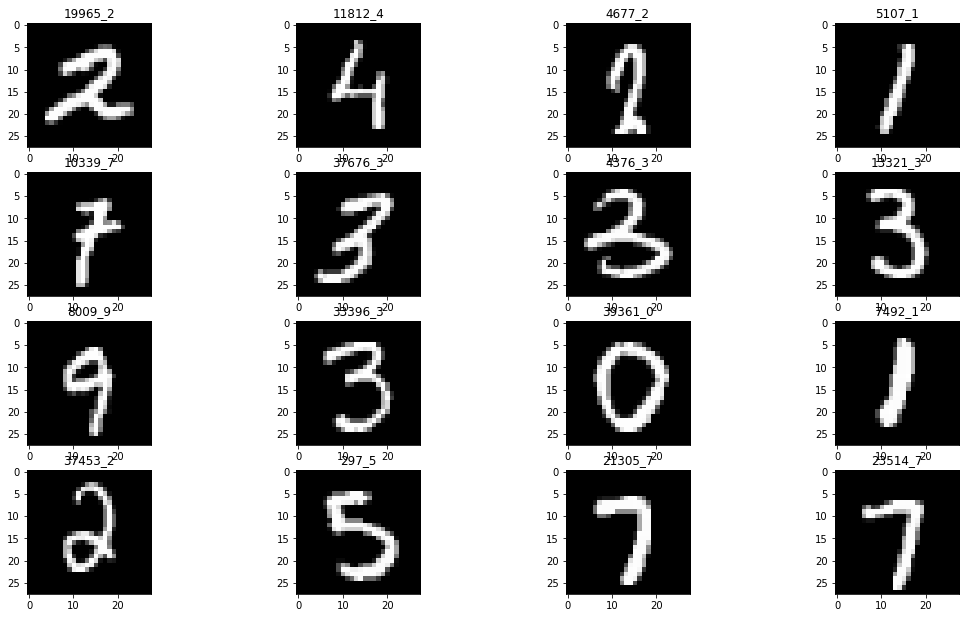

In [68]:
fig,axes=plt.subplots(4,4)
fig.set_size_inches(18.5, 10.5)

for r in range(4):
    for c in range(4):
        idx=np.random.randint(0,42000)
        axes[r,c].imshow(reconstruct[idx,:].reshape(28,28),cmap='gray')
        axes[r,c].set_title(str(idx)+'_'+str(Y[idx]))
plt.show()

(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)
(784, 1)


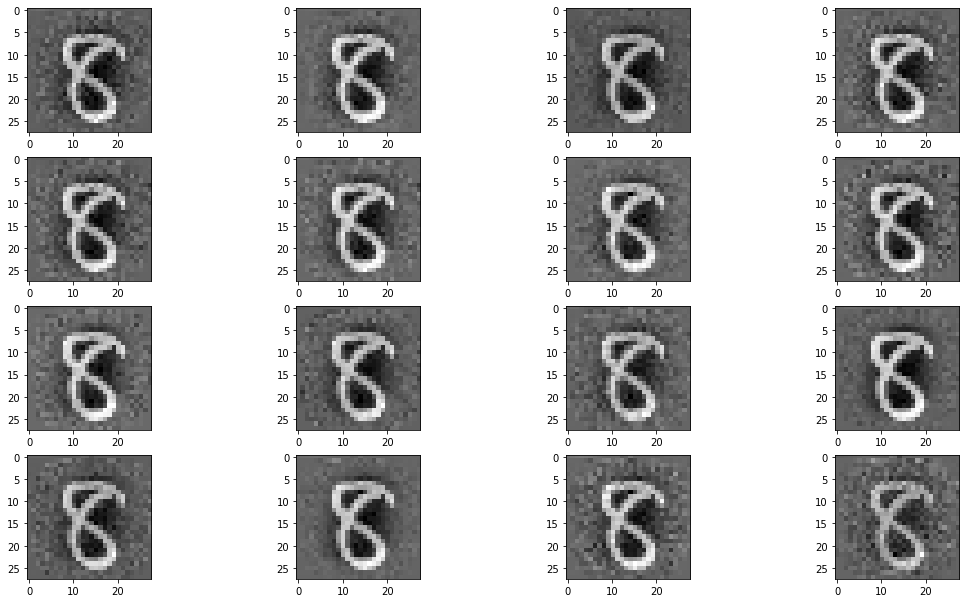

In [72]:
fig,axes=plt.subplots(4,4)
fig.set_size_inches(18.5, 10.5)

randompoint=pc_projection[np.random.randint(0,42000),:]
for r in range(4):
    for c in range(4):
        for i in range(components):
            scaled_singular_vals[i][0] = np.random.normal(0, 0.2)*new_S[i]
        scaled_singular_vecs = np.dot(new_U,scaled_singular_vals)
        reconstruct=randompoint.reshape(-1,1)+scaled_singular_vecs.reshape(-1,1)
        reconstruct=np.dot(reconstruct.T,Vt)
        #econstruct=np.dot(reconstruct.T,pc.T)+mean
        #im=(reconstruct[1420,:].reshape(-1,1)+scaled_eigen_vecs).reshape(28,28)
        im=reconstruct.reshape(28,28)
        axes[r,c].imshow(im,cmap='gray')
plt.show()

In [31]:
np.diagonal(np.matrix(S))

array([5.14849045])

(784, 784)
